In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from numpy import quantile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import linear_model
from sklearn.linear_model import SGDOneClassSVM

from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import roc_curve, roc_auc_score


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/moje pliki/data'

[Errno 2] No such file or directory: '/content/drive/My Drive/moje pliki/data'
/content


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#shape of data
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Exploratory data analysis


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

In [ ]:
print(len(df_fraud), len(df_normal))

492 284315


In [ ]:
outlier_fraction = len(df_fraud)/float(len(df_normal))

In [ ]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(df_fraud)))
print("Normal Cases : {}".format(len(df_normal)))

0.0017304750013189597
Fraud Cases : 492
Normal Cases : 284315


<ipython-input-34-e219b3e2fdac>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes = pd.value_counts(df['Class'], sort = True)


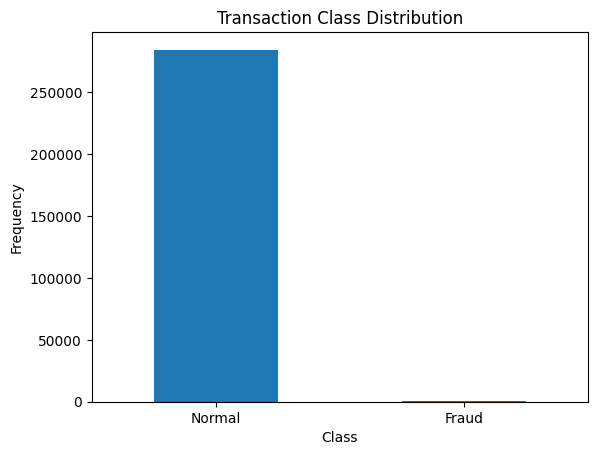

In [ ]:
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), labels = ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
df[['Class', 'Amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5']].describe()

,Class,Amount,Time,V1,V2,V3,V4,V5
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,0.001727,88.349619,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16
std,0.041527,250.120109,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00
min,0.000000,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02
25%,0.000000,5.600000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01
50%,0.000000,22.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02
75%,0.000000,77.165000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01
max,1.000000,25691.160000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01


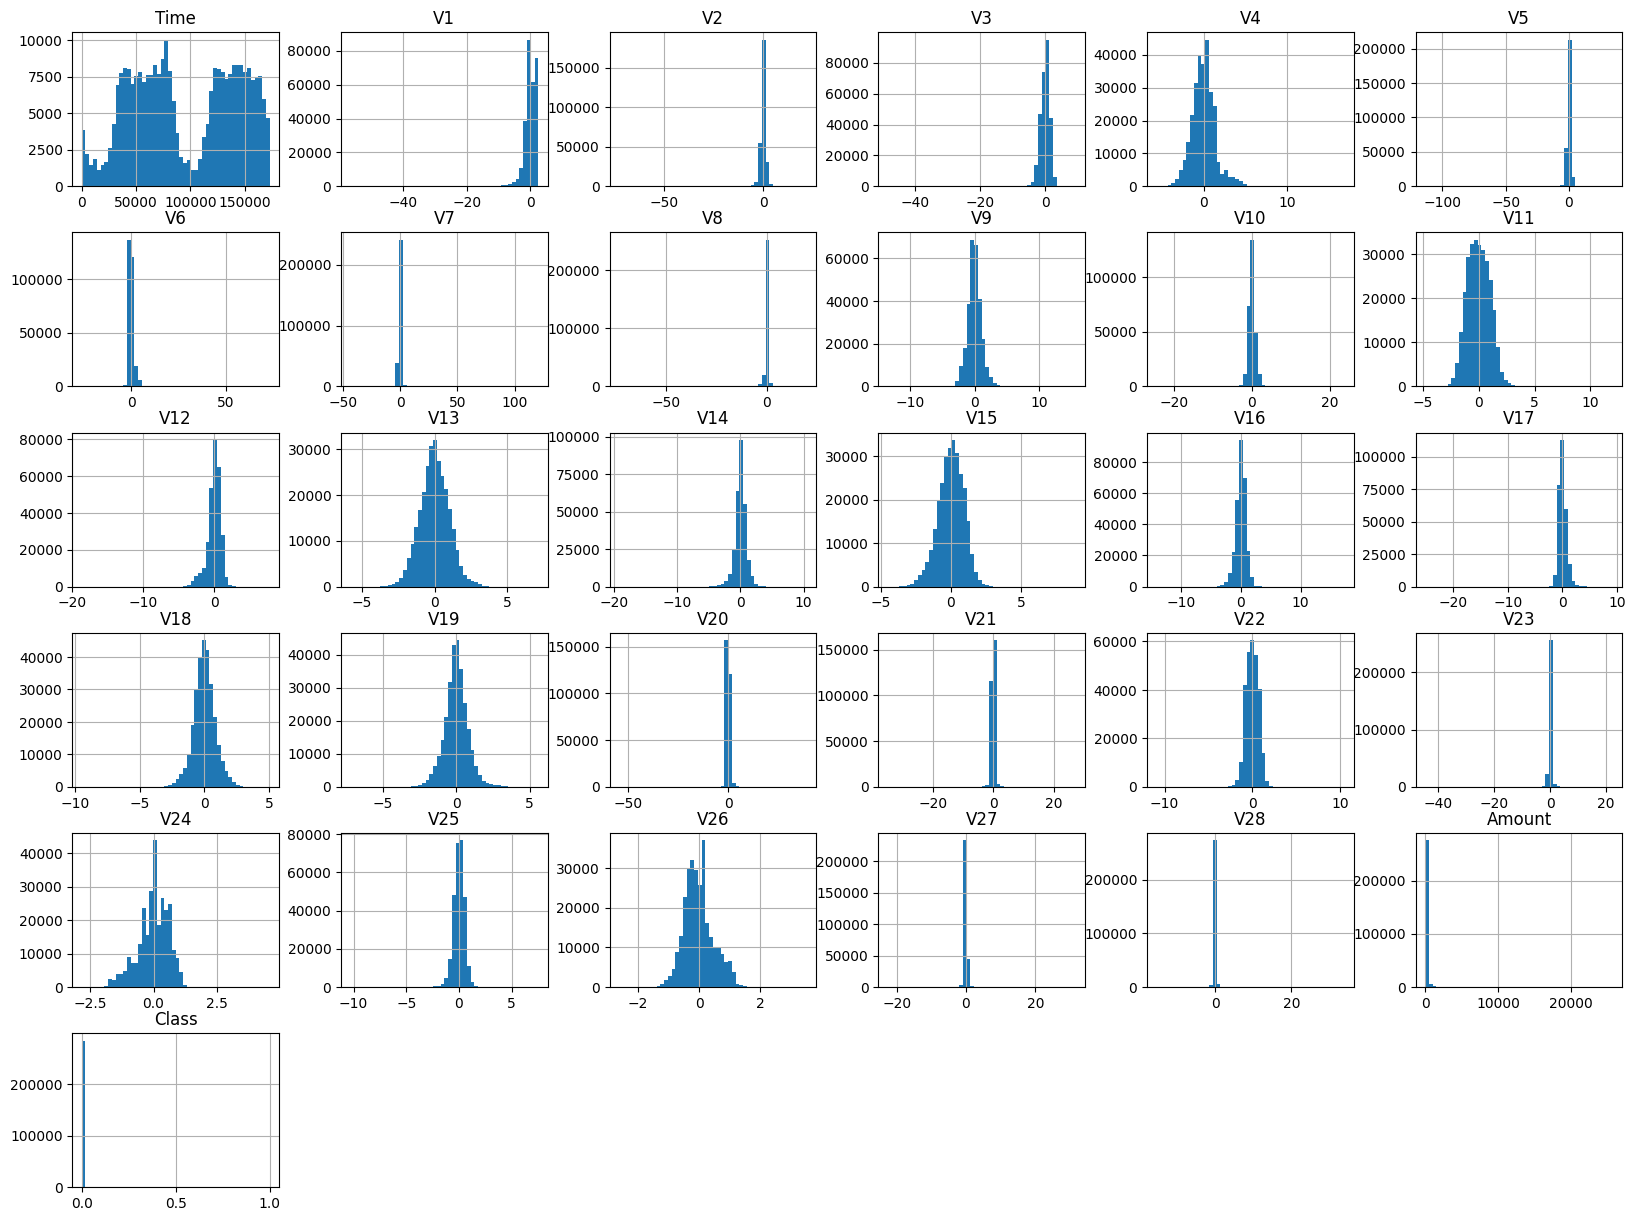

In [ ]:
df.hist(figsize=(20, 15), bins=50);

In [ ]:
df['Time'] = df['Time'].apply(lambda x : x / 3600)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


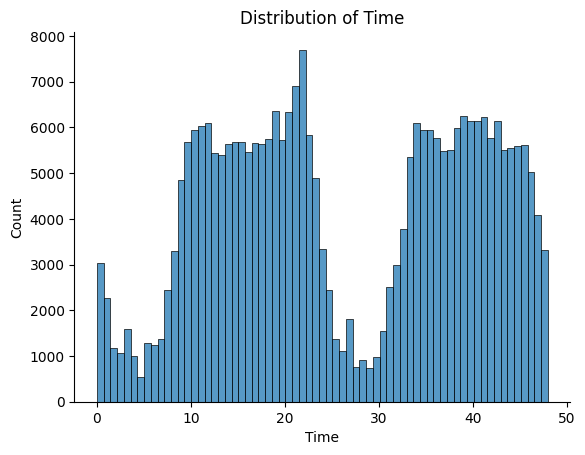

In [ ]:
sns.histplot(df['Time'])
plt.title("Distribution of Time")
sns.despine();

Analysis of Transaction Amount Data

In [ ]:
print(df_normal.Amount.describe())
print('----------------')
print(df_fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
----------------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


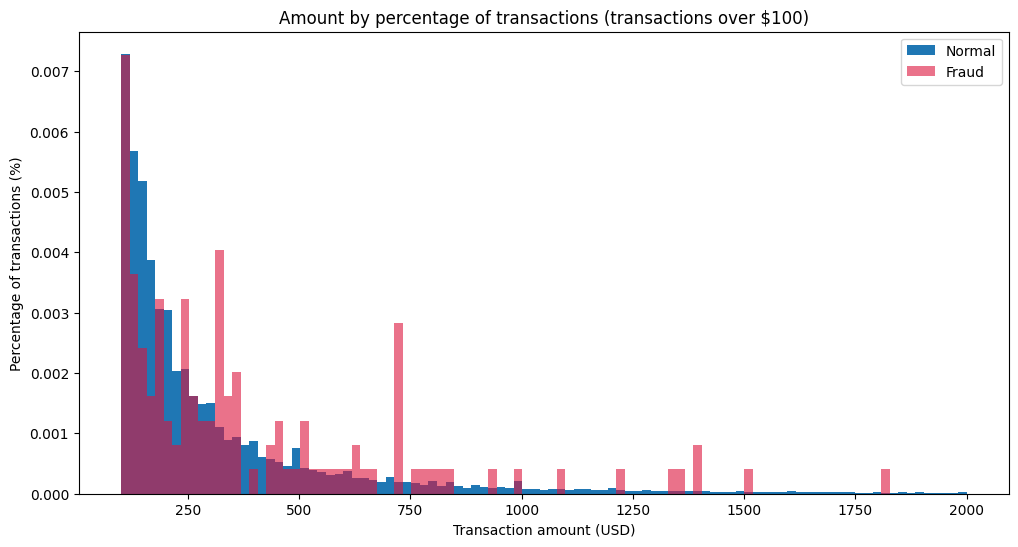

In [ ]:
bins = np.linspace(100, 2000, 100)
plt.figure(figsize=(12, 6))
plt.hist(df_normal.Amount, bins, alpha=1, density=True, label='Normal')
plt.hist(df_fraud.Amount, bins, alpha=0.6, density=True, label='Fraud', color='crimson')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions over \$100)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

Transaction by hour

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


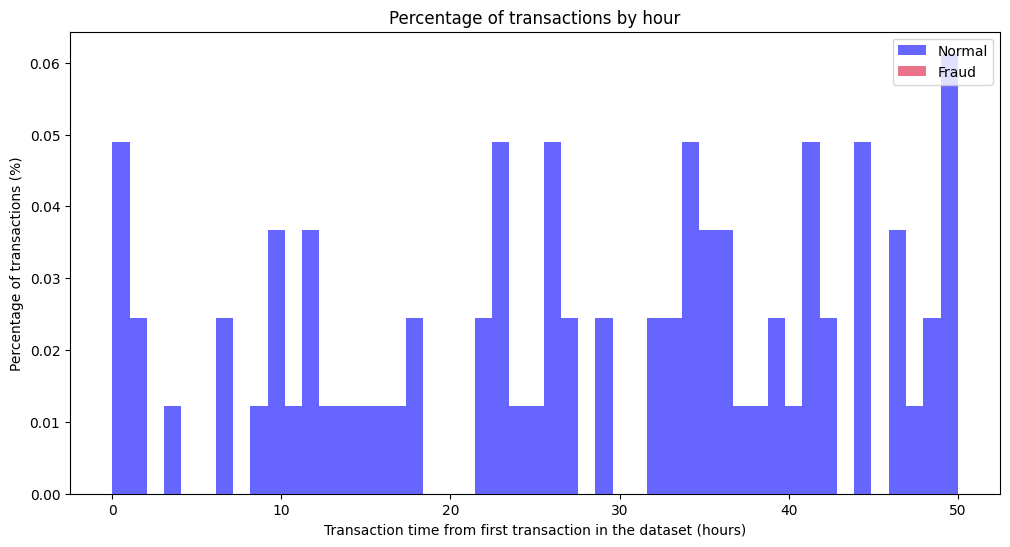

In [ ]:
bins = np.linspace(0, 50, 50)
plt.figure(figsize=(12, 6))
plt.hist(df_normal.Time, bins, alpha=0.6, density=True, label='Normal', color='blue')
plt.hist(df_fraud.Time, bins, alpha=0.6, density=True, label='Fraud', color='crimson')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

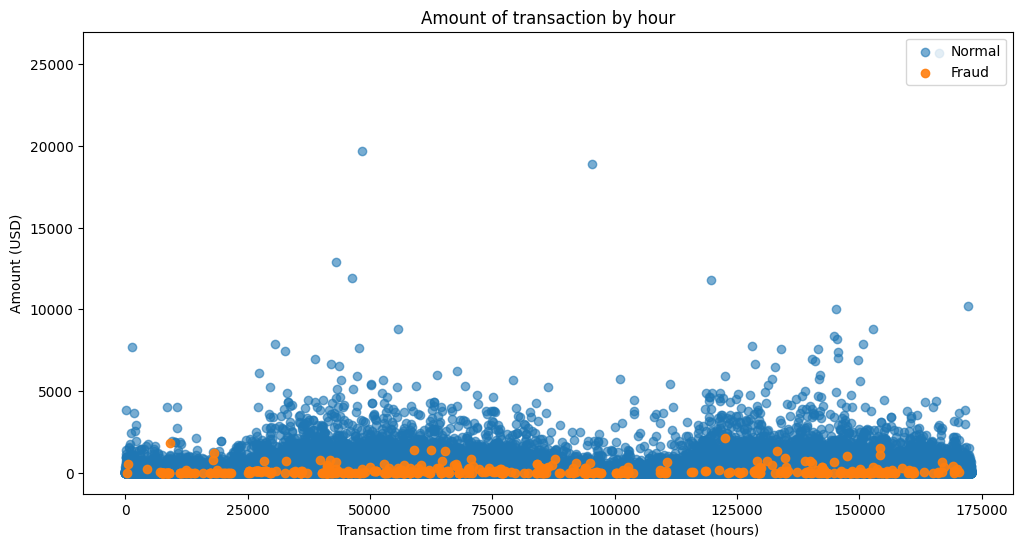

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df_normal.Time, df_normal.Amount, alpha=0.6, label='Normal')
plt.scatter(df_fraud.Time, df_fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

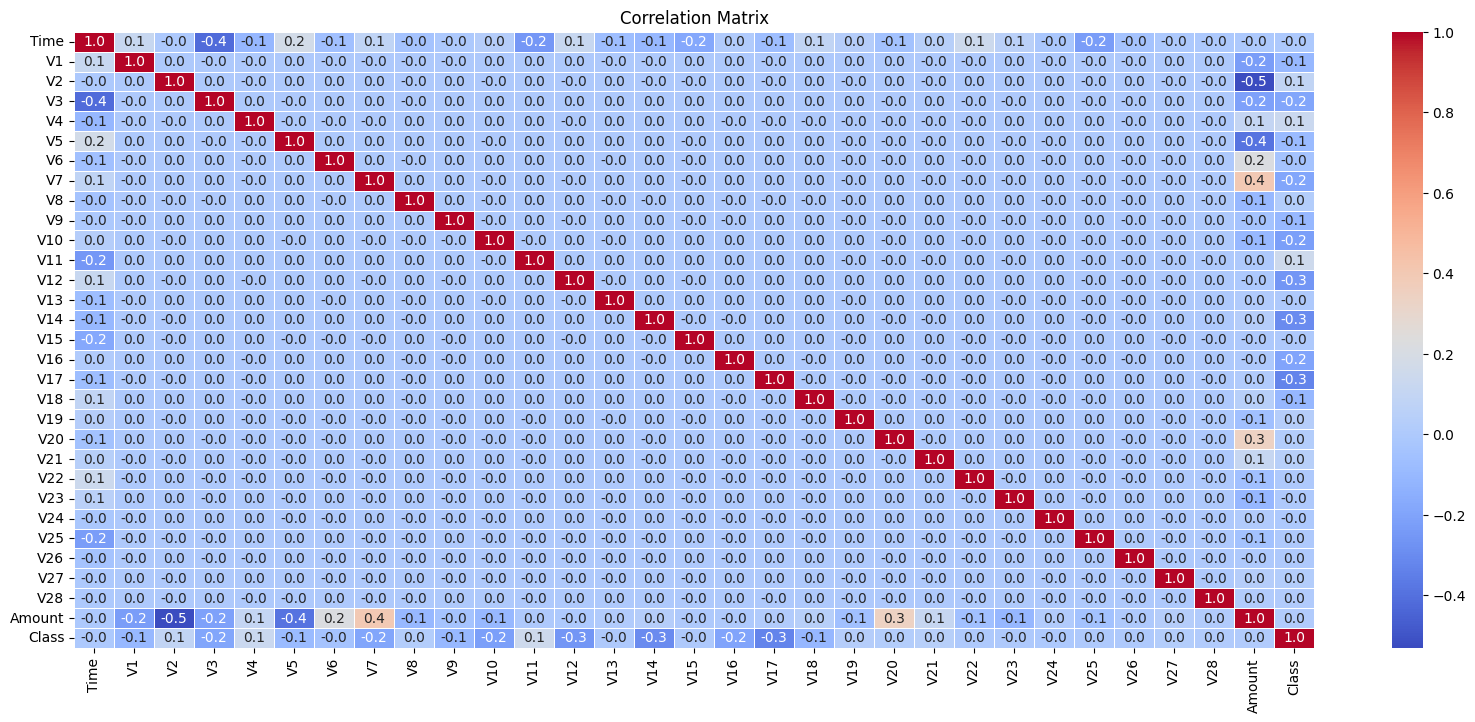

In [ ]:
corr = df.corr()

plt.figure(figsize=(20,8))
ax = sns.heatmap(corr.round(2), annot = True, linewidth=0.5, fmt='0.1f', cmap = 'coolwarm')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
ax.set(title="Correlation Matrix");
plt.show()

In [ ]:
df_norm = df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))

In [ ]:
train, test = train_test_split(df_norm, test_size=0.3, random_state = 10)

In [ ]:
X_train = train[train['Class'] == 0]
X_train = X_train.drop(['Class'], axis=1)

X_test = test.drop(['Class'], axis=1)
y_test = test['Class']

In [ ]:
print(f'X_train shape: {X_train.shape};')
print(f'X_test shape: {X_test.shape}; y_test shape: {y_test.shape}')

X_train shape: (199013, 30);
X_test shape: (85443, 30); y_test shape: (85443,)


In [ ]:
model_iF = IsolationForest(n_estimators=20, max_samples='auto',
                           contamination=0.01, random_state=42, verbose=2)
model_iF.fit(X_train)

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

IsolationForest(contamination=0.01, n_estimators=20, random_state=42, verbose=2)

In [ ]:
y_pred = model_iF.predict(X_test)

In [ ]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [ ]:
print("Accuracy Score :")
print(accuracy_score(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test, y_pred))

Accuracy Score :
0.9888346617042941
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85302
           1       0.08      0.53      0.14       141

    accuracy                           0.99     85443
   macro avg       0.54      0.76      0.57     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
f1_score(y_test, y_pred)

0.1358695652173913

In [ ]:
if_cm = confusion_matrix(y_test, y_pred)

In [ ]:
def confusion_matrix_plot(cm):
    df_cm = pd.DataFrame(cm,['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (6,4))
    ax = sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
    ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
    plt.show()

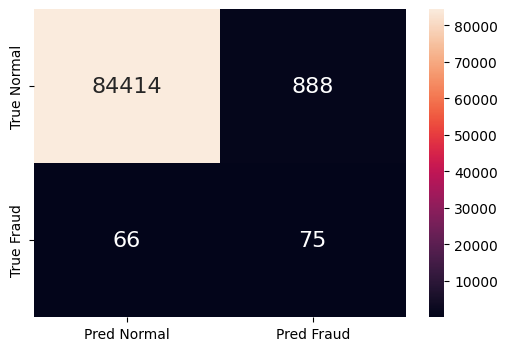

In [ ]:
confusion_matrix_plot(if_cm)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

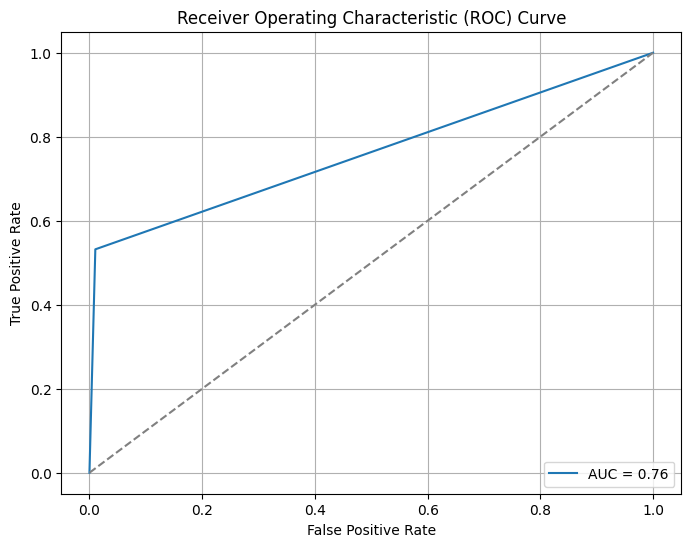

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Local Outlier factor

In [ ]:
model_lf = LocalOutlierFactor(n_neighbors=2, contamination=0.1)
model_lf.fit(X_train)

LocalOutlierFactor(contamination=0.1, n_neighbors=2)

In [ ]:
pred_y = model_lf.fit_predict(X_test)

scores_pred = model_lf.negative_outlier_factor_

In [ ]:
scores_pred

array([-0.963436  , -1.66356015, -1.47840219, ..., -1.2933778 ,
       -1.02333547, -1.2375596 ])

In [ ]:
thresh = quantile(scores_pred, .03)
print(thresh)

-2.1923635497719056


In [ ]:
pred_y[pred_y == 1] = 0
pred_y[pred_y == -1] = 1

In [ ]:
print("Accuracy Score :")
print(accuracy_score(y_test, pred_y))
print("Classification Report :")
print(classification_report(y_test, pred_y))

Accuracy Score :
0.8985990660440294
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85302
           1       0.00      0.08      0.00       141

    accuracy                           0.90     85443
   macro avg       0.50      0.49      0.47     85443
weighted avg       1.00      0.90      0.95     85443



In [ ]:
lf_cm = confusion_matrix(y_test, pred_y)

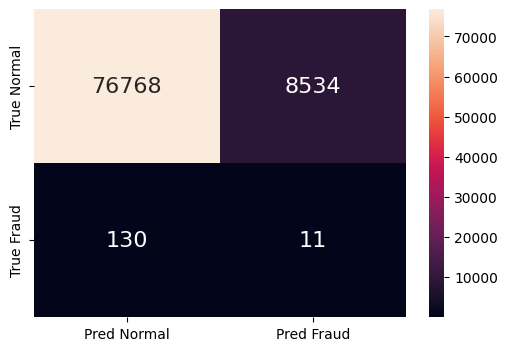

In [ ]:
confusion_matrix_plot(lf_cm)

One Class SVM

In [ ]:
model_sgd = SGDOneClassSVM(random_state=42, nu = 0.1, fit_intercept=True, shuffle=True, tol=1e-4)
model_sgd.fit(X_train)

SGDOneClassSVM(nu=0.1, random_state=42, tol=0.0001)

In [ ]:
pred = model_sgd.predict(X_test)

In [ ]:
pred[pred == 1] = 0
pred[pred == -1] = 1

In [ ]:
print("Accuracy Score :")
print(accuracy_score(y_test, pred))
print("Classification Report :")
print(classification_report(y_test, pred))

Accuracy Score :
0.9851714008169189
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85302
           1       0.09      0.84      0.16       141

    accuracy                           0.99     85443
   macro avg       0.54      0.91      0.58     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
svm_cm = confusion_matrix(y_test, pred)

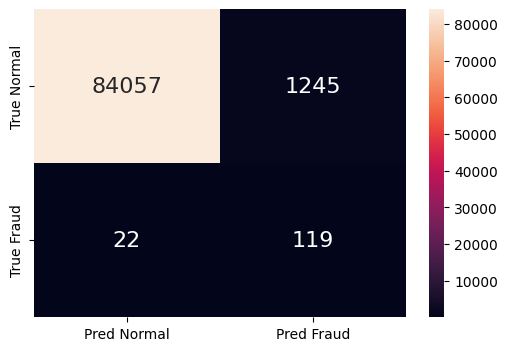

In [ ]:
confusion_matrix_plot(svm_cm)